<img src="https://s3.amazonaws.com/ByC_logo_prod/unit-26963.jpg" alt="Alt text that describes the graphic" width="600" />

# <center>Influence of sea-surface temperatures on wind speed in the North Atlantic basin using International Comprehensive Ocean-Atmosphere Data Set</center>

<center>Author: James B. Carter</center>

# Table of contents

- [Abstract](#Abstract)
- [Introduction](#Introduction)
- [1. The problem](#1.-The-problem)
- [2. Purpose of the study](#2.-Purpose-of-the-study)
- [3. Project description](#3.-Project-description)
    - [3.1 Hypothesis](#3.1-Hypothesis)
    - [3.2 Workflow](#3.2-Workflow)
    - [3.3 Methods](#3.3-Methods)
    - [3.4Analysis](#3.4-Analysis)
    - [3.5 Results](#3.5-Results)
- [4. Implementation (optional)](#4.-Implementation-(optional))
- [Conclusion](#Conclusion)
- [References](#References)

##  Abstract

The purpose of the project is to determine the relationship of sea-surface temperature and wind speed during the period of January 2000 to March 2021 in the North Atlantic. The relationship between sea-surface temperature (SST) and wind speed was determined using the International Comprehensive Ocean-Atmosphere Data Set (ICOADS). This dataset totals roughly 15GB. The dataset was loaded on a monthly basis via a loop that uses a function to initially clean the data and place it in a dataframe. An initial linear regression was performed to identify gross outliers. A boxplot of SST determined SST values well outside the range of normal temperatures. Once outliers were removed then two additional linear regressions were performed using two different ranges of data; all values and only values where wind speed is greater than 50 m/s indicating a category 3 hurricane. Due to the skewness of wind speed values they were log transformed for normalization and same linear regressions were performed once more. The analyses indicated that there is a relationship between SST and wind speed and it is statistically significant.

## Introduction

The study *Sea-surface temperatures and tropical cyclones in the Atlantic basin* (Michaels, P. J., et al., 2006) showed that there is a significant relationship between SST and wind speed when evaluating SST a week prior to the passage of a tropical storm. This study used the Hurricane Databases (HURDAT) dataset from 1982-2005.

In contrast, the present project uses the International Comprehensive Ocean-Atmosphere Data Set (ICOADS) from January 2000 to March 2021. The project consists of loading, cleaning, and analyzing the relationship between wind speed and sea-surface temperatures (SST) using an ordinary least squares (OLS) linear regression modeland the creates and tests the accuracy of a predictive model. The regression analyses and models are performed multiple times on different subsets of the data.

## 1. The problem

Michaels et al. (2006) determined a significant relationship between SST and wind speed in the week prior to the passage of a tropical storm - this study used the HURDAT dataset from 1982-2005. Climate projections predict that warming will cause an increase in SST. This increase in SST has been shown to lead to a greater frequency and intensity of tropical cyclones. These cyclones negatively affect coastal human populations, infrastructure, and ecological systems. The present project's goal is to determine if there is a relationship between wind speed and sea-surface temperature in the North Atlantic basin via the ICOADS and if that relationship can be used to create a predictive model. This was performed using linear regression techniques.

[Back to top](#Table-of-contents)

## 2. Purpose of the study

Purpose of this study is to identify a relationship between sea-surface temperature and wind speed in the North Atlantic basin using the ICOADS and create a model capable of predicting wind speed values using SST as the predictor value.

[Back to top](#Table-of-contents)

## 3. Project description

The ICOADS was downloaded from the National Center for Atmospheric Research (NCAR) website; each file represents one month of data. The first file of data was loaded and analyzed to determine what cleaning was necessary to create a single dataframe of the wind speed and SST variables. A function was written to load a single file, clean it, and append it to a newly created dataframe. This function was written into a loop to open each of the NetCDF files, clean them, and append them to the new dataframe. This dataframe was checked for duplicates where the first duplicate was saved and the rest were dropped. Once completed this dataframe was saved as a PKL to ease reloading of the dataframe.

An initial exploration of the data via scatterplots indicated there were outliers outside the normal range for SST in the North Atlantic basin. These outliers for SST were explored using a frequency histogram and boxplot. They were removed using interquartile range.

With the outliers removed an ordinary least squares (OLS) linear regression was performed using SST as the independent variable and wind speed (W) as the dependent variable.

The same analysis was performed with only the rows having a wind speed greater than 50 m/s which is indicative of a category 3 and above hurricane.

A following step was to log transform the wind speed values due to their right-skewed distribution. This skewness was determined previously in a frequency histogram of wind speed that was made when identifying outliers.

Finally, the same analyses and models were performed again on the entire log transformed data and the subset of log transformed wind speed greater than 50 m/s data.

[Back to top](#Table-of-contents)

### 3.1 Hypothesis

Null hypothesis: There is no relationship between sea-surface temperature and wind speed

Alternate hypothesis: There is a relationship between sea-surface temperature and wind speed

[Back to top](#Table-of-contents)

### 3.2 Workflow

[Back to top](#Table-of-contents)

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from math import sqrt

In [2]:
# load first dataset to determine what needs to be cleaned
ds = xr.open_dataset('C:/Users/Jimmy/Project/Project - Data/ICOADS data/ICOADS_R3.0.0_2000-01.nc')
df = ds.to_dataframe()

In [3]:
# looking at what the initial data looks like
df.head()

,time,date,crs,HR,lat,lon,TI,LI,DS,VS,...,CHE,AM,AH,UM,UH,SBI,SA,RI,UID,IRF
obs,,,,,,,,,,,,,,,,,,,,,
0,1999-12-29 00:00:00,b'20000199',-2147483647,NaN,25.629999,121.910004,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'DPEBRM',1.0
1,1999-12-29 00:00:00,b'20000199',-2147483647,NaN,25.629999,121.910004,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'DPEBRN',1.0
2,1999-12-29 00:00:00,b'20000199',-2147483647,NaN,25.590000,122.000000,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'DPEBRO',1.0
3,1999-12-29 00:00:00,b'20000199',-2147483647,NaN,25.570000,122.019997,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'DPEBRP',1.0
4,1999-12-29 00:00:00,b'20000199',-2147483647,NaN,25.500000,121.830002,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'DPEBRQ',1.0


In [4]:
# looking at what the initial data looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608486 entries, 0 to 608485
Columns: 204 entries, time to IRF
dtypes: float32(183), int32(1), object(18), timedelta64[ns](2)
memory usage: 519.9+ MB


In [5]:
# only columns W, SST WI, lat, and lon are needed according to ICOADS info pdf
# W is wind speed
# SST is ser surface temperature
# WI is wind speed indicator
# WI will be used to determine which W rows can be used or need to be converted to m/s
# lat is latitude
# lon is longitude
# lat and lon will be used to select only data for the North Atlantic

In [6]:
# function to load/clean data
def read_icoads(df, icoads):
    ds = xr.open_mfdataset(icoads, parallel = True)
    data = ds.to_dataframe()
    # dropping all unnecessary columns
    data.drop(data.columns.difference(['time', 'lat', 'lon', 'WI', 'W', 'SST']), axis = 1, inplace = True)
    # dropping all rows with necessary missing data
    data.dropna(subset = ['WI', 'W', 'SST'], inplace = True)
    # dropping rows with WI = 2, 5, 6 which are inaccurate
    data.drop(data[(data['WI'] == 2)].index, inplace = True) # 2 indicates estimated from unknown units
    data.drop(data[(data['WI'] == 5)].index, inplace = True) # 5 indicates Beaufort force which is categorical
    data.drop(data[(data['WI'] == 6)].index, inplace = True) # 6 indicates estimated from unknown units and method
    # dropping rows with lat/lon outside the North Atlantic
    data.drop(data[(data['lat'] < 0.936028)].index, inplace = True)
    data.drop(data[(data['lat'] > 68.638722)].index, inplace = True)
    data.drop(data[(data['lon'] < 12.005944)].index, inplace = True)
    data.drop(data[(data['lon'] > 98.053917)].index, inplace = True)
    # convert W (wind speed) values to m/s following conversions for WI (wind indicator) categories
    # WI = 0, 1, 8 in m/s
    # WI = 3, 4 in knots
    # 1 kn = 0.5144 m/s
    data['W'] = np.where(data['WI'] == 3, data['W'] * 0.5144, data['W']) # convert WI = 3 from kn to m/s
    data['W'] = np.where(data['WI'] == 4, data['W'] * 0.5144, data['W']) # convert WI = 4 from kn to m/s
    data['W'] = data['W'].astype(float)
    # all of wind speed ('W') is now in m/s
    # deleting Wind Speed measure method - no longer useful
    del data['WI'] # deleting WI column
    df = df.append(data, ignore_index = True)
    return df

In [7]:
# create initial dataframe for fxn to append to
df = pd.DataFrame(columns = ['time', 'lat', 'lon', 'W', 'SST'])
df

,time,lat,lon,W,SST


In [8]:
# loops through datasets cleaning and appending to df
basepath = 'C:/Users/Jimmy/Project/Project - Data/ICOADS data/'
for filename in os.listdir(basepath):
    if filename.endswith('.nc'):
        df = read_icoads(df, basepath+filename)

In [9]:
# cleaned dataframe
df

,time,lat,lon,W,SST
0,1999-12-29 00:00:00,56.599998,17.700001,4.21808,2.0
1,1999-12-29 00:00:00,55.299999,14.400000,2.93208,3.0
2,1999-12-29 00:00:00,54.200001,12.100000,3.00000,3.3
3,1999-12-29 00:00:00,54.099998,12.100000,0.25720,4.3
4,1999-12-29 00:00:00,34.599998,22.100000,10.00000,17.0
...,...,...,...,...,...
3442102,2021-03-28 23:00:00.000014,21.799999,38.599998,3.70368,26.0
3442103,2021-03-28 23:00:00.000014,16.900000,54.000000,1.59464,29.0
3442104,2021-03-28 23:00:00.000014,11.590000,92.599998,0.00000,30.0
3442105,2021-03-28 23:00:00.000014,5.900000,94.400002,3.96088,30.9


In [10]:
# save dataframe as .pkl for backup
df.to_pickle('C:/Users/Jimmy/Project/Project - Data/ICOADS pkl/icoads_data.pkl')

In [11]:
# To reload dataframe if needed
df = pd.read_pickle('C:/Users/Jimmy/Project/Project - Data/ICOADS pkl/icoads_data.pkl')
df

In [12]:
# check for duplicate rows
print(df.duplicated().sum())

5020


In [13]:
# drop duplicate rows
df.drop_duplicates(keep = 'first' , inplace = True)
df

,time,lat,lon,W,SST
0,1999-12-29 00:00:00,56.599998,17.700001,4.21808,2.0
1,1999-12-29 00:00:00,55.299999,14.400000,2.93208,3.0
2,1999-12-29 00:00:00,54.200001,12.100000,3.00000,3.3
3,1999-12-29 00:00:00,54.099998,12.100000,0.25720,4.3
4,1999-12-29 00:00:00,34.599998,22.100000,10.00000,17.0
...,...,...,...,...,...
3442102,2021-03-28 23:00:00.000014,21.799999,38.599998,3.70368,26.0
3442103,2021-03-28 23:00:00.000014,16.900000,54.000000,1.59464,29.0
3442104,2021-03-28 23:00:00.000014,11.590000,92.599998,0.00000,30.0
3442105,2021-03-28 23:00:00.000014,5.900000,94.400002,3.96088,30.9


In [14]:
# check to make sure no duplicate rows
print(df.duplicated().sum())

0


In [15]:
# deleting rows no longer needed to prevent duplicate removal errors
del df['time'] # time no longer needed
del df['lat'] # lat no longer needed
del df['lon'] # lon no longer needed
df

,W,SST
0,4.21808,2.0
1,2.93208,3.0
2,3.00000,3.3
3,0.25720,4.3
4,10.00000,17.0
...,...,...
3442102,3.70368,26.0
3442103,1.59464,29.0
3442104,0.00000,30.0
3442105,3.96088,30.9


In [16]:
# degree symbol for plots
deg = u"\N{DEGREE SIGN}"

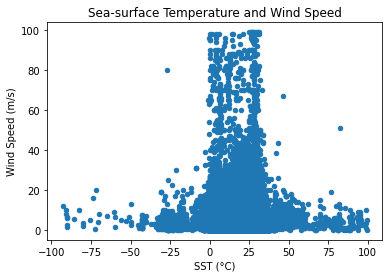

In [17]:
# scatter plot of SST and W
df.plot.scatter('SST', 'W')
plt.title('Sea-surface Temperature and Wind Speed')
plt.xlabel('SST ('+deg+'C)')
plt.ylabel('Wind Speed (m/s)')
plt.show()

In [18]:
# linear regression
X = sm.add_constant(df['SST'])
y = df['W']

In [19]:
#linear regression
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                 1.734e+05
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        19:53:31   Log-Likelihood:            -9.0617e+06
No. Observations:             3437087   AIC:                         1.812e+07
Df Residuals:                 3437085   BIC:                         1.812e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2737      0.004   1484.867      0.0

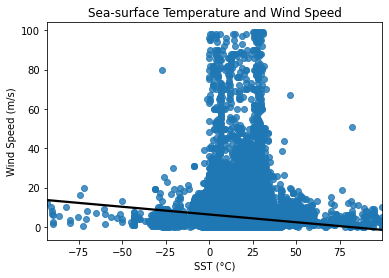

In [20]:
# linear regression plot
sns.regplot(x = 'SST', y = 'W', data = df, line_kws = {'color':'black'})
plt.title('Sea-surface Temperature and Wind Speed')
plt.xlabel('SST ('+deg+'C)')
plt.ylabel('Wind Speed (m/s)')
plt.show()

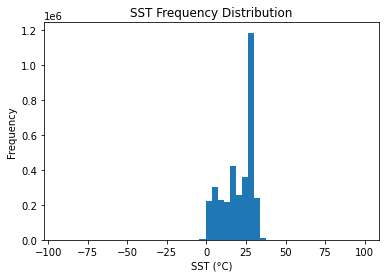

In [21]:
# frequency distribution of SST
plt.hist(df['SST'], bins = 50)
plt.title('SST Frequency Distribution')
plt.xlabel('SST ('+deg+'C)')
plt.ylabel('Frequency')
plt.show()

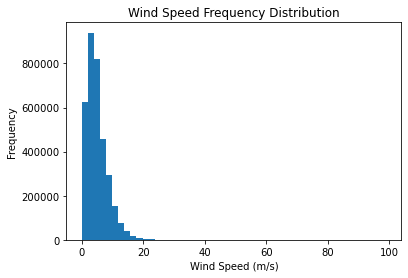

In [22]:
# frequency distribution of W
plt.hist(df['W'], bins = 50)
plt.title('Wind Speed Frequency Distribution')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

In [23]:
# outliers for W are acceptable due to them representing tropical storms
# outliers for SST are unacceptable due to SSTs not being in those ranges so they are likely measurement errors

In [24]:
# original max/min for W and SST
print('df max: ')
print(df.max())
print('')
print('df min: ')
print(df.min())

df max: 
W      99.0
SST    99.5
dtype: float64

df min: 
W       0.0
SST   -93.0
dtype: float64


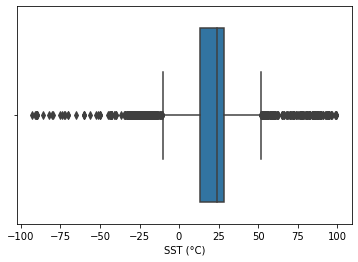

In [25]:
# finding outliers - boxplot
sns.boxplot(x = df['SST'])
plt.xlabel('SST ('+deg+'C)')
plt.show()

In [26]:
# finding outliers - IQR
Q1 = df['SST'].quantile(0.25)
Q3 = df['SST'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

15.600000381469727


In [27]:
# df with outliers removed
df_o = df[((df['SST'] > (Q1 - 1.5 * IQR)) & (df['SST'] < (Q3 + 1.5 * IQR)))]
df_o

,W,SST
0,4.21808,2.0
1,2.93208,3.0
2,3.00000,3.3
3,0.25720,4.3
4,10.00000,17.0
...,...,...
3442102,3.70368,26.0
3442103,1.59464,29.0
3442104,0.00000,30.0
3442105,3.96088,30.9


In [28]:
# checking new max/min without outliers
print('df_o max: ')
print(df_o.max())
print('')
print('df_o min: ')
print(df_o.min())

df_o max: 
W      99.0
SST    52.0
dtype: float64

df_o min: 
W       0.0
SST   -10.0
dtype: float64


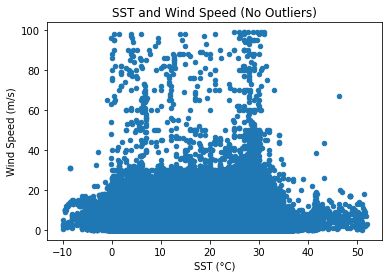

In [29]:
# scatterplot without outliers
df_o.plot.scatter('SST', 'W')
plt.title('SST and Wind Speed (No Outliers)')
plt.xlabel('SST ('+deg+'C)')
plt.ylabel('Wind Speed (m/s)')
plt.show()

In [30]:
# linear regression without outliers
X = sm.add_constant(df_o['SST'])
y = df_o['W']

In [31]:
#linear regression without outliers
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                 1.751e+05
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        19:59:46   Log-Likelihood:            -9.0580e+06
No. Observations:             3436097   AIC:                         1.812e+07
Df Residuals:                 3436095   BIC:                         1.812e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2878      0.004   1483.438      0.0

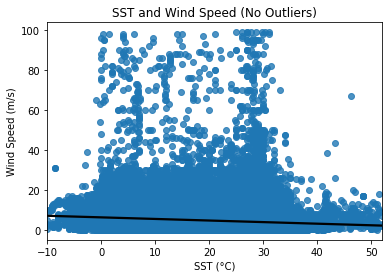

In [32]:
# linear regression plot without outliers
sns.regplot(x = 'SST', y = 'W', data = df_o, line_kws = {'color':'black'})
plt.title('SST and Wind Speed (No Outliers)')
plt.xlabel('SST ('+deg+'C)')
plt.ylabel('Wind Speed (m/s)')
plt.show()

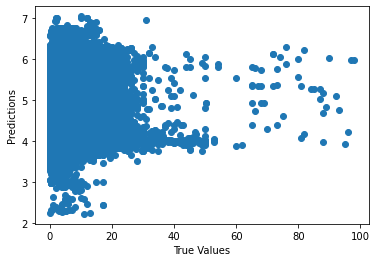

In [33]:
# train/test linear model without outliers
X = df_o[['SST']]
y = df_o['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
pred = lm.predict(X_test)

plt.scatter(y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [34]:
# MAE, MSE, RMSE without outliers
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = sqrt(metrics.mean_squared_error(y_test, pred))

print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MAE: 2.5150050491260365
MSE: 11.38178911220409
RMSE: 3.373690725630328


In [35]:
# creating dataframe of all rows with W > 50 m/s
df_50 = df_o[df_o['W'] > 50]
df_50

,W,SST
1995,57.000000,25.600000
2172,99.000000,25.000000
2406,57.000000,27.799999
5272,55.000000,24.799999
8163,81.000000,3.000000
...,...,...
3317412,50.256878,30.100000
3335535,62.000000,10.000000
3336568,69.000000,14.800000
3338363,81.000000,27.000000


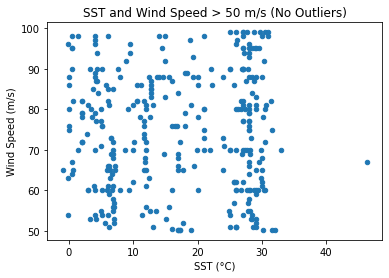

In [36]:
# scatter plot of all SST and W > 50 m/s
df_50 = df_o[(df_o['W'] > 50)]
df_50.plot.scatter('SST', 'W')
plt.title('SST and Wind Speed > 50 m/s (No Outliers)')
plt.xlabel('SST ('+deg+'C)')
plt.ylabel('Wind Speed (m/s)')
plt.show()

In [37]:
# linear regression of W > 50 m/s
X = sm.add_constant(df_50['SST'])
y = df_50['W']

In [38]:
#linear regression of W > 50 m/s
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.06962
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.792
Time:                        20:05:51   Log-Likelihood:                -1353.0
No. Observations:                 332   AIC:                             2710.
Df Residuals:                     330   BIC:                             2718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.1352      1.497     49.509      0.0

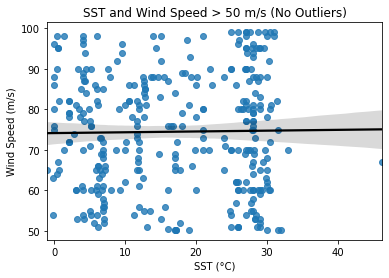

In [39]:
# linear regression plot of W > 50 m/s
sns.regplot(x = 'SST', y = 'W', data = df_50, line_kws = {'color':'black'})
plt.title('SST and Wind Speed > 50 m/s (No Outliers)')
plt.xlabel('SST ('+deg+'C)')
plt.ylabel('Wind Speed (m/s)')
plt.show()

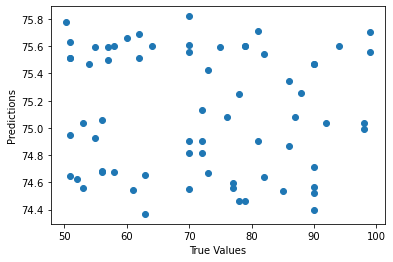

In [40]:
# train/test linear model of W > 50 m/s
X = df_50[['SST']]
y = df_50['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
pred = lm.predict(X_test)

plt.scatter(y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [41]:
# MAE, MSE, RMSE of W > 50 m/s
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = sqrt(metrics.mean_squared_error(y_test, pred))

print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MAE: 12.881250686691056
MSE: 225.56752214471527
RMSE: 15.018905490904299


In [42]:
# creating log transformed dataframe
df_log = pd.concat([df_o['SST'], np.log(df_o['W'].add(1))], axis = 1, keys = ['SST', 'W'])
df_log

,SST,W
0,2.0,1.652130
1,3.0,1.369169
2,3.3,1.386294
3,4.3,0.228887
4,17.0,2.397895
...,...,...
3442102,26.0,1.548345
3442103,29.0,0.953448
3442104,30.0,0.000000
3442105,30.9,1.601583


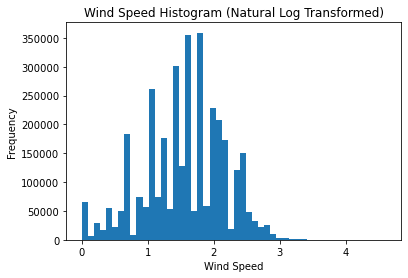

In [43]:
# frequency distribution of W from log transformed dataframe
plt.hist(df_log['W'], bins = 50)
plt.title('Wind Speed Histogram (Natural Log Transformed)')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

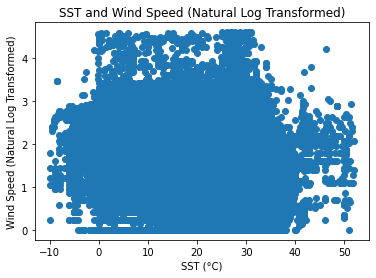

In [44]:
# scatterplot of log transformed dataframe
plt.scatter(df_log['SST'], df_log['W'])
plt.title('SST and Wind Speed (Natural Log Transformed)')
plt.xlabel('SST ('+deg+'C)')
plt.ylabel('Wind Speed (Natural Log Transformed)')
plt.show()

In [45]:
# linear regression of log transformed dataframe
X = sm.add_constant(df_log['SST'])
y = df_log['W']

In [46]:
#linear regression of log transformed dataframe
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                 1.616e+05
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        20:05:58   Log-Likelihood:            -3.0997e+06
No. Observations:             3436097   AIC:                         6.199e+06
Df Residuals:                 3436095   BIC:                         6.199e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8349      0.001   2451.695      0.0

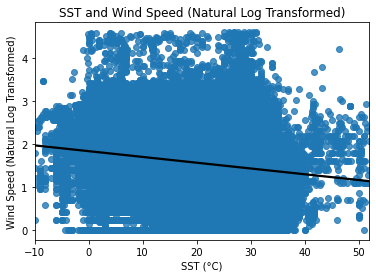

In [47]:
# linear regression plot
sns.regplot(x = 'SST', y = 'W', data = df_log, line_kws = {'color':'black'})
plt.title('SST and Wind Speed (Natural Log Transformed)')
plt.xlabel('SST ('+deg+'C)')
plt.ylabel('Wind Speed (Natural Log Transformed)')
plt.show()

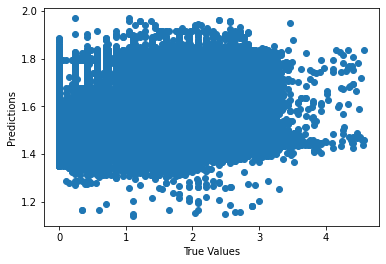

In [48]:
# train/test linear model of log transformed dataframe
X = df_log[['SST']]
y = df_log['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
pred = lm.predict(X_test)

plt.scatter(y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [49]:
# MAE, MSE, RMSE of log transformed dataframe
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = sqrt(metrics.mean_squared_error(y_test, pred))

print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MAE: 0.477768034707505
MSE: 0.3553748010907792
RMSE: 0.5961332075054863


In [50]:
# creating log transformed dataframe of W > 50 m/s
df_log = pd.concat([df_50['SST'], np.log(df_50['W'].add(1))], axis = 1, keys = ['SST', 'W'])
df_log

,SST,W
1995,25.600000,4.060443
2172,25.000000,4.605170
2406,27.799999,4.060443
5272,24.799999,4.025352
8163,3.000000,4.406719
...,...,...
3317412,30.100000,3.936850
3335535,10.000000,4.143135
3336568,14.800000,4.248495
3338363,27.000000,4.406719


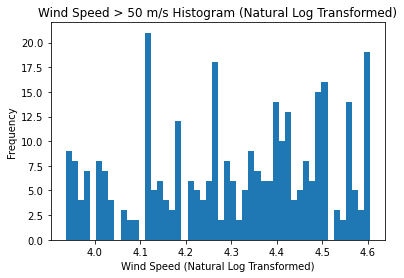

In [51]:
# frequency distribution of log transformed dataframe of W > 50 m/s
plt.hist(df_log['W'], bins = 50)
plt.title('Wind Speed > 50 m/s Histogram (Natural Log Transformed)')
plt.xlabel('Wind Speed (Natural Log Transformed)')
plt.ylabel('Frequency')
plt.show()

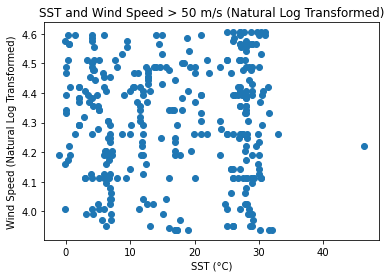

In [52]:
# scatterplot of log transformed dataframe of W > 50 m/s
plt.scatter(df_log['SST'], df_log['W'])
plt.title('SST and Wind Speed > 50 m/s (Natural Log Transformed)')
plt.xlabel('SST ('+deg+'C)')
plt.ylabel('Wind Speed (Natural Log Transformed)')
plt.show()

In [53]:
# linear regression of log transformed dataframe of W > 50 m/s
X = sm.add_constant(df_log['SST'])
y = df_log['W']

In [54]:
#linear regression of log transformed dataframe of W > 50 m/s
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.002968
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.957
Time:                        20:12:03   Log-Likelihood:                 73.111
No. Observations:                 332   AIC:                            -142.2
Df Residuals:                     330   BIC:                            -134.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3043      0.020    210.905      0.0

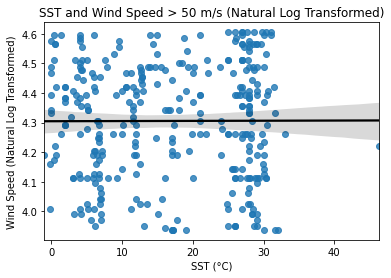

In [55]:
# linear regression plot of log transformed dataframe of W > 50 m/s
sns.regplot(x = 'SST', y = 'W', data = df_log, line_kws = {'color':'black'})
plt.title('SST and Wind Speed > 50 m/s (Natural Log Transformed)')
plt.xlabel('SST ('+deg+'C)')
plt.ylabel('Wind Speed (Natural Log Transformed)')
plt.show()

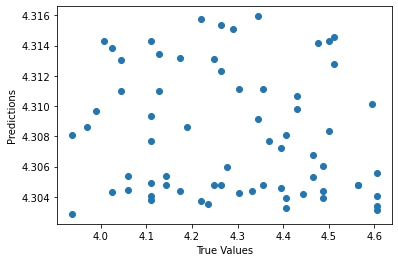

In [56]:
# train/test linear model of log transformed dataframe of W > 50 m/s
X = df_log[['SST']]
y = df_log['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
pred = lm.predict(X_test)

plt.scatter(y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [57]:
# MAE, MSE, RMSE of log transformed dataframe of W > 50 m/s
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = sqrt(metrics.mean_squared_error(y_test, pred))

print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MAE: 0.1650557313107496
MSE: 0.03673789283467784
RMSE: 0.19167131458483255


### 3.3 Methods

The primary mathematical and computational method being used in this analysis is the ordinary least squares linear regression. It is being used as both a regression analysis and model. The data is being plotted using histograms, scatterplots, and boxplots. Interquartile range was calculated and used to remove outliers. Log transformation, using natural log, was utilized to normalize the wind speed data due to skewness.

[Back to top](#Table-of-contents)

### 3.4 Analysis 

The first ordinary least squares (OLS) linear regression performed on the raw data (n = 3437087) using SST as the independent variable and windspeed as the dependent variable resulted in a R2 of 0.048 (P < 0.001) which showed the relationship between SST and wind speed to be significant and negative (coef = -0.0786) which was not anticipated. The initial linear regression plot also showed SST values outside the range of what is normally expected. The following frequency histograms and boxplots showed that these outliers needed to be removed. The interquartile range was used to trim the data.

Once the outliers were removed the OLS linear regression was performed again (n = 3436097). This revealed a statistically significant relationship (R2 = 0.048, P < 0.001) but again the relationship was negative (coef = -0.0793). This was confirmed with an OLS model using a training dataset. The mean absolute error (MAE) of this model was 2.51.

The third analysis was performed with only observation a wind speed greater than 50 m/s (n = 332). This revealed a nonsignificant relationship. This was confirmed with an OLS model using a training dataset. The model had a MAE of 12.94.

The final analyses were performed after log transforming the wind speed data. This decisions was made because of the right skewness of the wind speed data. The analysis of the whole data (n = 3436097) revealed a significant relationship (R2 = 0.045, P < 0.001) that was negative (coef = -0.0134). This was confirmed with an OLS model using a training dataset. The model had a MAE of 0.478. The analysis of the wind speed greater than 50 m/s (n = 332) revealed an nonsignificant relationship. This was confirmed with an OLS model using a training dataset. The model had a MAE of 0.187.

[Back to top](#Table-of-contents)

### 3.5 Results

The results of these analyses lead to an acceptance of the hypothesis that SST and wind speed have a significant relationship. However, the analyses that showed significant relationships were all negative in contrast to the positive influence of sea-surface temperature on wind speed shown by Michaels et al. All but the analyses using wind speed greater than 50 m/s had low P-values (P < 0.001). It is likely that the relationship between wind speed and SST being significant is due to having such a high value of observations for the other analyses.

[Back to top](#Table-of-contents)

## Conclusion

Next steps to take are to determine why there are high wind speed values with low SST values.

These analyses and models indicated a significant relationship between SST and wind speed, albeit negative, in the North Atlantic basin. The results are in contrast to what was identified by Michaels et al. Michaels et al. came to the conclusion that there is a significant positive relationship between wind speed and SST.

The results of these analyses suggest it is necessary to further investigate the relationship between SST, wind speed, and other atmospheric and oceanographic variables. Additionally, the ICOADS should be used to further replicate the statistical analyses performed by Michaels et al. such as identifying the data associated with tropical cyclones from the previous seven days of maximum wind speed.

[Back to top](#Table-of-contents)

## References

- Deisenroth, Marc P., Faisal A. A., Ong, Cheng S. 2020. *Mathematics for Machine Learning*. Cambridge University Press.


- Michaels, Patrick J., Knappenberger, Paul C., Davis, Robert E. Sea-surfacce temperatures and tropical cyclones in the Atlantic basin. 10 May 2006. Geophysical Research Letter, Vol. 33, Issue 9. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2006GL025757. Accessed 02 005 2021.


- National Oceanic and Atmospheric Administration, ICOADS Release 3.1 (R3.1), September 2016, https://rda.ucar.edu/datasets/ds548.0/docs/R3.0-imma1_short.pdf. Accessed 27 004 2021.


- Research Data Archive/Computational and Information Systems Laboratory/National Center for Atmospheric Research/University Corporation for Atmospheric Research, Physical Sciences Laboratory/Earth System Research Laboratory/OAR/NOAA/U.S. Department of Commerce, Cooperative Institute for Research in Environmental Sciences/University of Colorado, National Oceanography Centre/University of Southampton, Met Office/Ministry of Defence/United Kingdom, Deutscher Wetterdienst (German Meteorological Service)/Germany, Department of Atmospheric Science/University of Washington, Center for Ocean-Atmospheric Prediction Studies/Florida State University, and National Centers for Environmental Information/NESDIS/NOAA/U.S. Department of Commerce (2016): International Comprehensive Ocean-Atmosphere Data Set (ICOADS) Release 3, Individual Observations. Research Data Archive at the National Center for Atmospheric Research, Computational and Information Systems Laboratory. Dataset. https://doi.org/10.5065/D6ZS2TR3. Accessed 27 004 2021.


- Shafer, Douglas S., Zhang, Zhiyi. 2012. *Introductory Statistics*. Saylor Foundation.

[Back to top](#Table-of-contents)